In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
plt.style.use('ggplot')

In [66]:
dim = 3
nump = 1000
nums = 1024
dt = 0.05
zeta = 1
m = 1
kBT = 1
std = np.sqrt(2*kBT*zeta*dt)
np.random.seed(0)
R = np.zeros([nump,dim]) # array to store current position
V = np.zeros([nump,dim]) # array to store current velocity
W = np.zeros([nump,dim]) # array to store current random forces
Rs = np.zeros([nums,nump,dim]) # array to store positions
Vs = np.zeros([nums,nump,dim]) # array to store velocities
Ws = np.zeros([nums,nump,dim]) # array to store random  forces
time = np.zeros([nums]) # array to store all time steps

In [67]:
for i in range(nums):
    W = std*np.random.randn(nump,dim)
    R, V = R + V*dt, (V*(1-zeta/m*dt))+(W/m)
    Rs[i]=R
    Vs[i]=V
    Ws[i]=W
    time[i] =i*dt

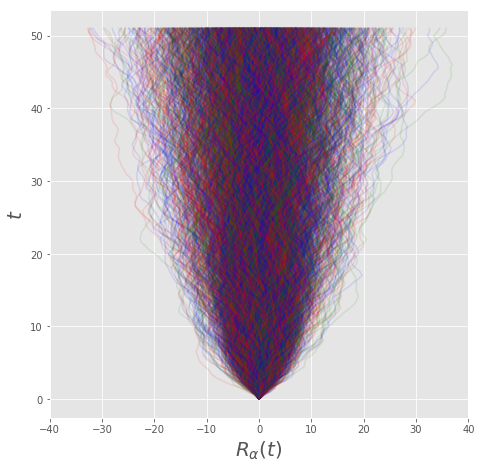

In [68]:
# particle positions vs. time
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$R_{\alpha}(t)$", fontsize=20)
ax.set_ylabel(r"$t$", fontsize=20)
ax.set_xlim(-40,40)
ts = 10 # only draw every 10 points
for n in range(nump):
    lx = ax.plot(Rs[::ts,n,0],time[::ts],'r', alpha=0.1)
    ly = ax.plot(Rs[::ts,n,1],time[::ts],'b', alpha=0.1)
    lz = ax.plot(Rs[::ts,n,2],time[::ts],'g', alpha=0.1)
#leg = ax.legend([lx,ly,lz],[r"$x$",r"$y$",r"$z$"],loc=0,fontsize=16)
#for l in leg.get_lines():
#    l.set_alpha(l)
plt.show()

/home/raghav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


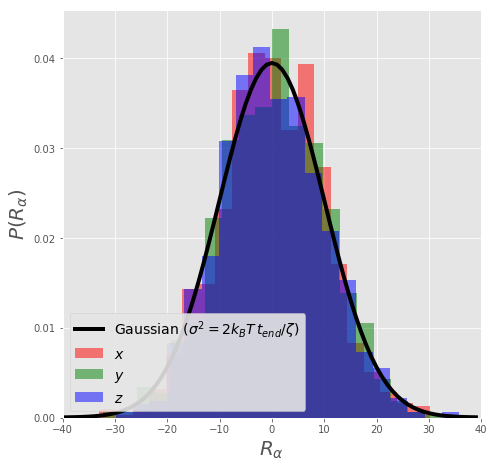

In [50]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$R_{\alpha}}(t=t_\mathrm{end})$", fontsize=20)
ax.set_ylabel(r"$P(R_{\alpha})$", fontsize=20)
ax.hist(Rs[-1,:,0],bins=20,normed=True,color='r',alpha=0.5,lw=0,label=r"$x$")
ax.hist(Rs[-1,:,1],bins=20,normed=True,color='g',alpha=0.5,lw=0,label=r"$y$")
ax.hist(Rs[-1,:,2],bins=20,normed=True,color='b',alpha=0.5,lw=0,label=r"$z$")
sig2 = 2*kBT/zeta*dt*nums
ave=0.0
x = np.arange(-40,40,1)
y = np.exp(-(x-ave)**2/2/sig2)/np.sqrt(2*np.pi*sig2)
ax.plot(x,y,lw=4,color='k',label=r"Gaussian $(\sigma^2=2k_BT\,t_{end}/\zeta)$")
ax.legend(fontsize=14,loc=3,framealpha=0.9)
ax.set_xlim(-40,40)
plt.show()

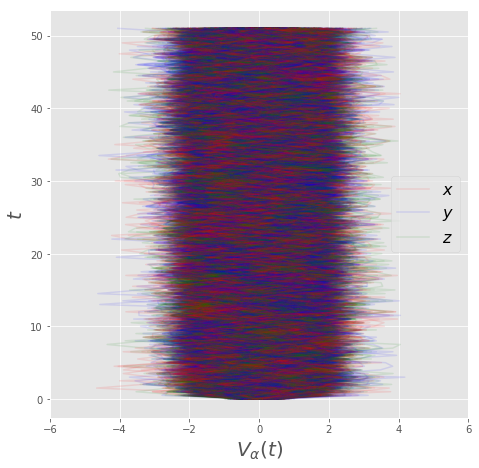

In [51]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$V_{\alpha}(t)$",fontsize=20)
ax.set_ylabel(r"$t$",fontsize=20)
ts=10
for n in range(nump):
    lx, = ax.plot(Vs[::ts,n,0],time[::ts],'r',alpha=0.1)
    ly, = ax.plot(Vs[::ts,n,1],time[::ts],'b',alpha=0.1)
    lz, = ax.plot(Vs[::ts,n,2],time[::ts],'g',alpha=0.1)
ax.set_xlim(-6,6)
leg = ax.legend([lx,ly,lz],[r"$x$",r"$y$",r"$z$"],loc=0,fontsize=16)
plt.show()

/home/raghav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


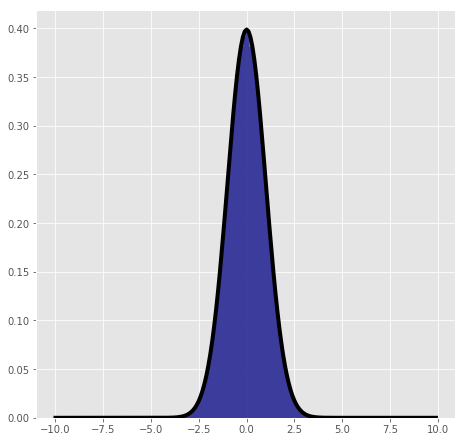

In [52]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.hist(Vs[nums//2:,:,0].flatten(),bins=100,normed=True,alpha=0.5,lw=0,color='r')
ax.hist(Vs[nums//2:,:,1].flatten(),bins=100,normed=True,alpha=0.5,lw=0,color='g')
ax.hist(Vs[nums//2:,:,2].flatten(),bins=100,normed=True,alpha=0.5,lw=0,color='b')
x = np.arange(-10,10,0.1)
sig2 = kBT/m
y = np.exp(-(x-ave)**2/2/sig2)/np.sqrt(2*np.pi*sig2)
ax.plot(x,y,lw=4,color='k',label=r"Maxwell-Boltzmann $(\sigma^2=k_BT/m$")

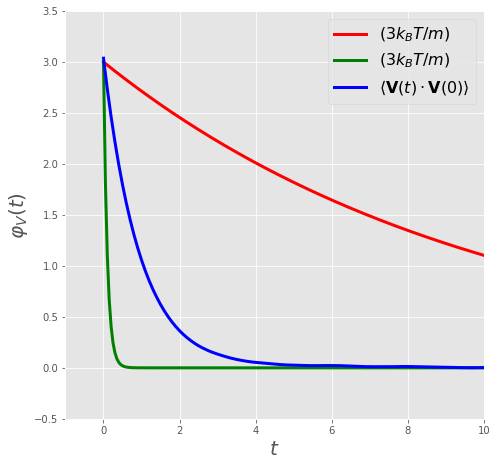

In [72]:
def auto_correlate(v):
    corr = np.correlate(v,v,mode='full')
    return corr[len(v)-1:]/len(v)
corr = np.zeros([nums])
for n in range(nump):
    for d in range(dim):
        corr = corr + auto_correlate(Vs[:,n,d])
corr = corr/nump # average over all particles
fig, ax = plt.subplots(figsize = (7.5,7.5))
ax.plot(time,dim*kBT/m*np.exp(-0.1/m*time),'r',lw=3,label=r'$(3k_BT/m)$')
ax.plot(time,dim*kBT/m*np.exp(-10/m*time),'g',lw=3,label=r'$(3k_BT/m)$')
ax.plot(time,corr,'b',lw=3,label=r'$\langle\mathbf{V}(t)\cdot \mathbf{V}(0)\rangle$')
ax.set_xlabel(r"$t$",fontsize=20)
ax.set_ylabel(r"$\varphi_V(t)$",fontsize=20)
ax.set_xlim(-1,10)
ax.set_ylim(-0.5,3.5)
ax.legend(fontsize=16)
plt.show()

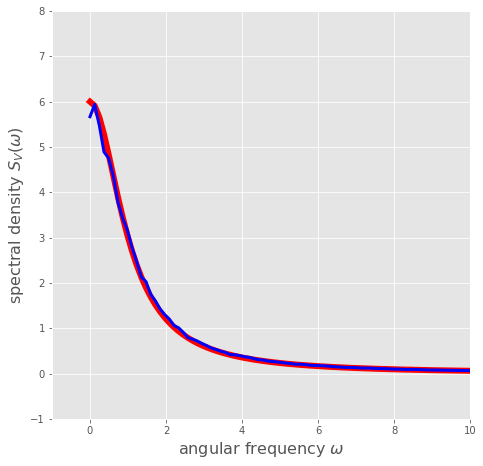

In [79]:
from numpy import fft
def psd(v,dt):
    vw = fft.fft(v)*dt
    return np.abs(vw[:nums//2])**2/(nums*dt)
Sw = np.zeros([nums//2])
for n in range(nump):
    for d in range(dim):
        Sw = Sw + psd(Vs[:,n,d],dt)
Sw = Sw/nump
fig, ax = plt.subplots(figsize=(7.5,7.5))
gamma = zeta/m
omega = fft.fftfreq(nums,d=dt)[:nums//2]*2.0*np.pi
ax.plot(omega,(6.0*kBT/m)*gamma/(omega**2 + gamma**2),'r',lw=6,label=r'$theoretical$')
ax.plot(omega,Sw,'b',lw=3,label=r'$|\mathbf{v}_\tau(\omega)|^2 / \tau$')
ax.set_xlabel(r"angular frequency $\omega$",fontsize=16)
ax.set_ylabel(r"spectral density $S_V(\omega)$",fontsize=16)
plt.xlim(-1,10)
plt.ylim(-1,8)
plt.show()